In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Poisson equation

In these exercise you will solve the Poisson equation

$$\nabla^{2}\phi = 4\pi G\rho$$

assuming spherical symetry

### Homogeneus Sphere

Consider the Poisson equation as a second order ODE and reduce it to first order 

#### 1.

Consider it with forward Euler using an appropiate initial condition. Remember , that the gravitational potential is determined only up to a constant, so you will need to adjust your result to match the boundary condition at $R = 10^{9} cm$

$$\phi(R) = -\frac{Gm(R)}{R}$$

Since you will have to compute the mass on your grid , assume that you are solving for the gravitational potential of a homogeneous sphere $(\rho =cte)$ , which is given by 

$$\phi(r) = \frac{2}{3}\pi G \rho(r^{2}-3R^{2})$$

Show that your code converges to the exact value of $\phi$ at $R_{\text{outer}}$. Doing this is a bit trichy and you must be careful to adjust your solution at $r = 0$ 



0.09775171065526103 %


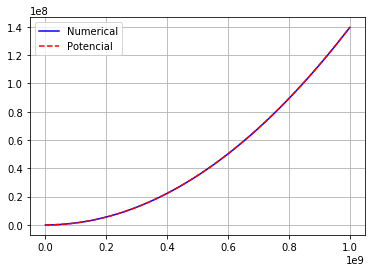

In [82]:
def ϕ(r):
    return (2/3.)*np.pi*G*rho*(r**2 - Rs**2)

n = 1024
Rs = 1e9 #m
r = np.linspace(0,Rs,n)
z = np.zeros(n)
phi = np.zeros(n)
G = 6.674e-11 
rho = 1.0
z[0]=0.0
for i in range(1,n-1):
    z[i+1] = z[i] +(r[i+1]-r[i])*(4*np.pi*G*rho-(2.0/r[i])*z[i])
    phi[i+1]= phi[i]+(r[i+1]-r[i])*z[i]
    
    
plt.plot(r,phi,"b-",label = "Numerical")
plt.plot(r,ϕ(r)-ϕ(r)[0],"r--",label = "Potencial")
plt.grid(True)
plt.legend()
a = ϕ(r)-ϕ(r)[0]
print ((a[-1]-phi[-1])/(a[-1])*100,"%")


#### 2.

Now you will try the more sophisticated matrix method. Write a code to solve Poisson equation via the linear system 

$$\mathcal{A}\Phi = \vec{b}$$

Check that your implementation works for the particle case $\rho = \text{cte}$

In [85]:
n = 1024
A = np.zeros((n,n))
phi = np.zeros(n)
rho = np.ones(n)
Rs = 1e9 #m
dr = Rs/n
r = np.linspace(0,Rs,n)
r[0]=0.1*dr

A[0,0] = -(1./(dr**2))-1./(r[0]*dr)
A[-1,-1]= -2./(dr**2)
A[-1,-2]= (1./(dr**2))-1./(r[0]*dr)

for i in range(1,n-1):
    A[i,i] = -2./(dr**2)
    A[i,i+1] = (1./(dr**2))+1./(r[i]*dr)
    A[i,i-1] = (1./(dr**2))-1./(r[i]*dr)

phi = np.linalg.solve(A,4*np.pi*G*rho)


-1.1081358988659469 %


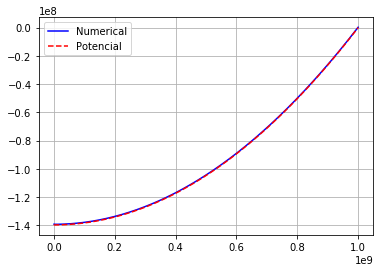

In [86]:
plt.plot(r[1:],phi[1:],"b-",label = "Numerical")
plt.plot(r,ϕ(r),"r--",label = "Potencial")
plt.grid(True)
plt.legend()

print (np.mean(np.abs(ϕ(r)[1:]-phi[1:])/(phi[1:])*100),"%")



## Stellar model 

A supernova is a process in which a dying starliberates a huge quantity of energy and mass.In this section we will solve Poisson equation to obtain the gravitational potential inside the massdistribution of dying star. 




In [93]:
data = np.loadtxt("data.dat")
index = data[:,0]
m = data[:,1]
r = data[:,2]
T = data[:,3]
rho = data[:,4]

len(rho)

1098

### 1.

Read the data and make a log-log plot of $\rho(r)$ for radiio $r < 10^{9}cm$

Text(0.5,1,'Log - Log plot ')

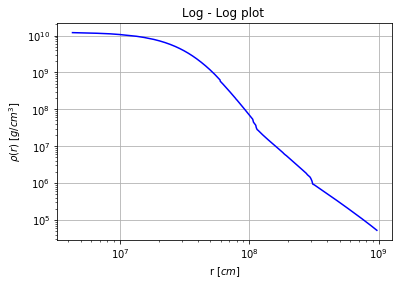

In [88]:
condition =np.where(r<1e9,r,0)
nonzeroindex = np.nonzero(np.where(r<1e9,r,0))[0][-1]
plt.plot(r[0:nonzeroindex],rho[0:nonzeroindex],"b-")
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.xlabel("r $[cm]$")
plt.ylabel("$\\rho(r)$ $[g/cm^{3}]$")
plt.title("Log - Log plot ")

### 2 ,3 
Set up an equdistant grid with an outer radius of $10^{9} cm$ and interpolate the density onto your new equidistant grid. You may choose what interpolation method to use.

Use the code that you write in the first exercise to obtain and plot the gravitational potential as a function of radius, solving the ODEs system.

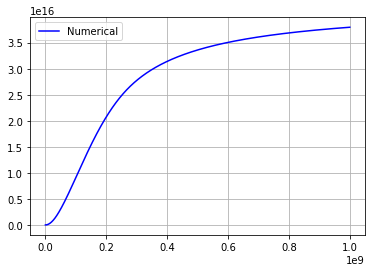

In [111]:
Rs = 1e9
R = np.linspace(0,Rs,len(r))
r = np.linspace(0,Rs,len(r))
rhointerp = np.interp(R,r,rho)

def ϕ(r,rho):
    return (2/3.)*np.pi*G*rho*(r**2 - Rs**2)

n = len(r)


z = np.zeros(n)
phi = np.zeros(n)
G = 6.674e-11 
Rho = rhointerp
z[0]=0.0
for i in range(1,n-1):
    z[i+1] = z[i] +(r[i+1]-r[i])*(4*np.pi*G*Rho[i]-(2.0/r[i])*z[i])
    phi[i+1]= phi[i]+(r[i+1]-r[i])*z[i]
    
plt.plot(r,phi,"b-",label = "Numerical")
plt.grid(True)
plt.legend()


## 4.

Use the code to solve the Poisson equation using the matrix method . Rememeber that you must stagger your grid (shift it by $0.5dx$ to make sure you have no point at the origin). Obtain again $\phi$ as a function of radius. The gravitational potential obtained with this method must match (within errors) the potential obtained with the ODE method. Plot both in same figure

In [97]:
n = len(r)
A = np.zeros((n,n))
phi = np.zeros(n)
Rs = 1e9 #m
dr = Rs/n
r = np.linspace(0,Rs,n)
r[0]=0.1*dr

A[0,0] = -(1./(dr**2))-1./(r[0]*dr)
A[-1,-1]= -2./(dr**2)
#A[-1,-2]= (1./(dr**2))-1./(r[0]*dr)

for i in range(1,n-1):
    A[i,i] = -2./(dr**2)
    A[i,i+1] = (1./(dr**2))+1./(r[i]*dr)
    A[i,i-1] = (1./(dr**2))-1./(r[i]*dr)

Phi = np.linalg.solve(A,4*np.pi*G*rho)

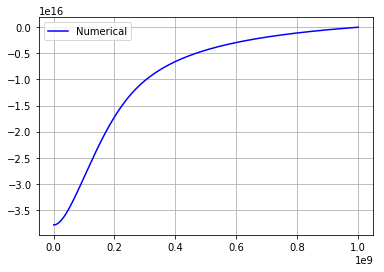

In [98]:
plt.plot(r[1:],Phi[1:],"b-",label = "Numerical")
plt.grid(True)
plt.legend()



comparation between two models

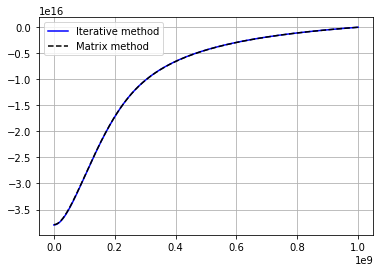

In [110]:
plt.plot(r,phi-phi[-1],"b-",label = "Iterative method")
plt.plot(r[1:],Phi[1:],"k--",label = "Matrix method")
plt.grid(True)
plt.legend()